In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_csv('Tweets.csv')

In [7]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
mood_count = tweets['airline_sentiment'].value_counts()
mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [16]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

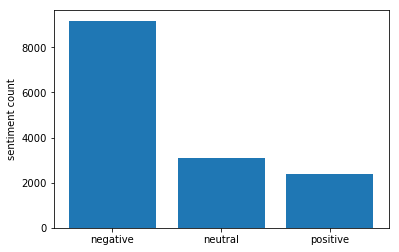

In [23]:
Index = [1, 2, 3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['negative', 'neutral', 'positive'])
plt.ylabel('sentiment count')

In [37]:
united = tweets[tweets['airline'] == 'United']
usairways = tweets[tweets['airline'] == 'US Airways']
american = tweets[tweets['airline'] == 'American']
southwest = tweets[tweets['airline'] == 'Southwest']
delta = tweets[tweets['airline'] == 'Delta']
virgin = tweets[tweets['airline'] == 'Virgin America']

In [50]:
def AirlineMood(airline, name):
    plt.figure()
    plt.title(name)
    mood_count = airline['airline_sentiment'].value_counts()
    Index = [1, 2, 3]
    plt.bar(Index, mood_count)
    plt.xticks(Index, ['negative', 'neutral', 'positive'])
    plt.ylabel('sentiment count')
    return mood_count

negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64

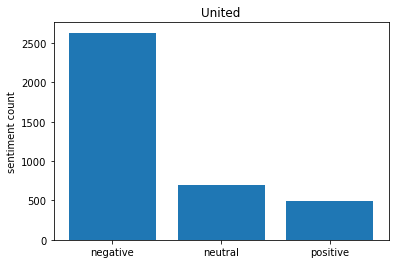

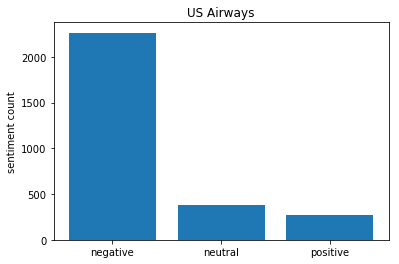

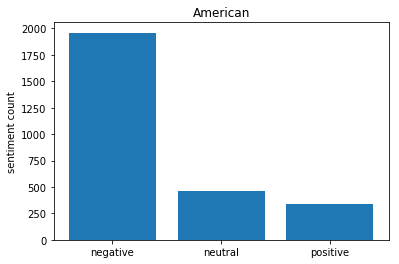

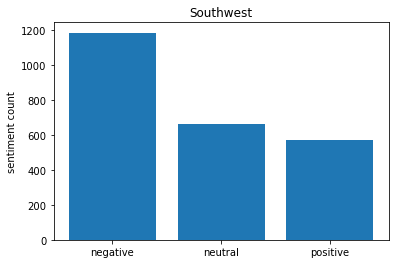

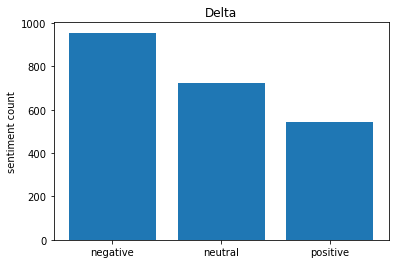

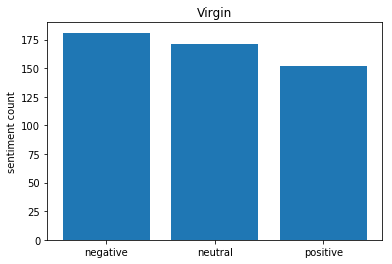

In [52]:
AirlineMood(united, 'United')
AirlineMood(usairways, 'US Airways')
AirlineMood(american, 'American')
AirlineMood(southwest, 'Southwest')
AirlineMood(delta, 'Delta')
AirlineMood(virgin, 'Virgin')

,negativereason
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178
Damaged Luggage,74


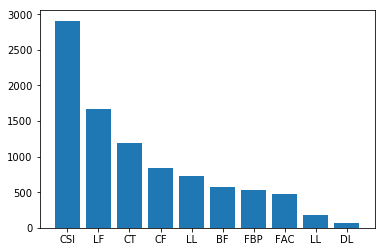

In [73]:
reason_counts = tweets['negativereason'].value_counts()
ticks = np.array(reason_counts.index)
index = np.arange(10)
plt.bar(index, reason_counts)
plt.xticks(index, ['CSI', 'LF', 'CT', 'CF', 'LL', 'BF', 'FBP', 'FAC', 'LL', 'DL'])
reason_counts_df = pd.DataFrame(reason_counts)
reason_counts_df

In [74]:
def AirlineReasons(airline, name):
    # Make function

SyntaxError: unexpected EOF while parsing (<ipython-input-74-0db7b2dc7255>, line 2)

In [77]:
from wordcloud import WordCloud, STOPWORDS

In [79]:
words = ' '.join(tweets['text'])

In [87]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color='black', height=2500, width=3000).generate(words)

(-0.5, 2999.5, 2499.5, -0.5)

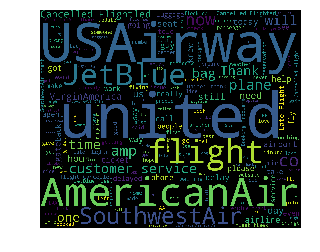

In [88]:
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')

In [90]:
tweets['sentiment'] = tweets['airline_sentiment'].apply(lambda x: 0 if x == 'negative' else 1)

In [91]:
data = tweets['text']
target = tweets['sentiment']

In [92]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
